In [116]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

from fuzzywuzzy import fuzz


# Load all six dataframes 
df_bechdel = pd.read_csv('/Users/justynakurach/Documents/GitHub/IronHackLabs/Week 5/Movie Bechdel Test Scores/Bechdel.csv')
df1 = pd.read_csv('/Users/justynakurach/Documents/GitHub/IronHackLabs/Week 5/FINAL DATASETS SELECTION/2Mmovies.csv')



/var/folders/k8/l3hrl_fn5y7bx5qcfv9y8p900000gn/T/ipykernel_72343/2130713014.py:18: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/justynakurach/Documents/GitHub/IronHackLabs/Week 5/FINAL DATASETS SELECTION/2Mmovies.csv')


In [117]:
df_bechdel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9373 entries, 0 to 9372
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9373 non-null   int64  
 1   title       9373 non-null   object 
 2   imdbid      9373 non-null   float64
 3   id          9373 non-null   int64  
 4   rating      9373 non-null   int64  
 5   year        9373 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 439.5+ KB


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590932 entries, 0 to 2590931
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   name            object 
 2   year            object 
 3   rating          float64
 4   certificate     object 
 5   duration        object 
 6   genre           object 
 7   votes           object 
 8   gross_income    object 
 9   directors_id    object 
 10  directors_name  object 
 11  stars_id        object 
 12  stars_name      object 
 13  description     object 
dtypes: float64(1), object(13)
memory usage: 276.7+ MB


In [119]:

df1 = df1.rename(columns={'id': 'imdbid'})
df1['imdbid'] = df1['imdbid'].str[2:]
df1['imdbid'] = df1['imdbid'].astype('float64')
df1['imdbid']

0          4710316.0
1          1281857.0
2          2294954.0
3          6843596.0
4          3705604.0
             ...    
2590927    9898738.0
2590928    9898742.0
2590929    9898746.0
2590930    9898802.0
2590931    9898812.0
Name: imdbid, Length: 2590932, dtype: float64

In [120]:
# A left join will include all rows from the left (or "first") dataframe
#(i.e. the original dataframe), and any matching rows from the right (or "additional") dataframe. 
#If there are any missing values in the right dataframe, the corresponding columns in the merged dataframe will contain null values.
merged_df_left = pd.merge(df_bechdel, df1, on='imdbid', how='left')


In [121]:
merged_df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 9372
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9373 non-null   int64  
 1   title           9373 non-null   object 
 2   imdbid          9373 non-null   float64
 3   id              9373 non-null   int64  
 4   rating_x        9373 non-null   int64  
 5   year_x          9373 non-null   int64  
 6   name            6592 non-null   object 
 7   year_y          6592 non-null   object 
 8   rating_y        6592 non-null   float64
 9   certificate     6592 non-null   object 
 10  duration        6592 non-null   object 
 11  genre           6592 non-null   object 
 12  votes           6592 non-null   object 
 13  gross_income    6592 non-null   object 
 14  directors_id    6592 non-null   object 
 15  directors_name  6592 non-null   object 
 16  stars_id        6592 non-null   object 
 17  stars_name      6592 non-null   o

In [122]:
# Check for duplicate movie imdbid in the final dataframe
duplicates = merged_df_left.duplicated(subset='imdbid')

# Count the number of duplicates
num_duplicates = sum(duplicates)

# Print the number of duplicates
print("Number of duplicate movie titles: ", num_duplicates)

Number of duplicate movie titles:  12


In [123]:
# Remove rows with duplicate movie titles
df_matches_dropped = merged_df_left.drop_duplicates(subset='imdbid', keep=False)

# Check the new number of rows in the dataframe
print("Number of rows in the cleaned dataframe: ", len(df_matches_dropped))

Number of rows in the cleaned dataframe:  9349


In [ ]:
df_matches_dropped.info()

In [124]:

# #drop the not needed columns
df_matches_dropped = df_matches_dropped.drop(['Unnamed: 0', 'year_y', 'name'], axis=1)

# # Reset the index of df_matches_dropped
df_matches_dropped = df_matches_dropped.reset_index(drop=True)

In [125]:
# #rename ambiguously named columns 
df = df_matches_dropped.rename(columns={'id': 'bechdel_id', 'rating_x': 'bechdel_score', 'rating_y': 'imdb_rating'})

# # create separate columns for each genre, rename and merge with original dataframe
genres = df_matches_dropped['genre'].str.split(',', expand=True)
genres.columns = ['genre_1', 'genre_2', 'genre_3']
df_matches_dropped = pd.concat([df_matches_dropped, genres], axis=1)

In [ ]:
df_matches_dropped.head()

In [126]:
df_matches_dropped['genre_1'].fillna(value='None', inplace=True)

In [127]:
df_matches_dropped['genre_2'].fillna(value='None', inplace=True)

In [128]:
df_matches_dropped['genre_3'].fillna(value='None', inplace=True)

In [129]:
df_matches_dropped['genre'].fillna(value='None', inplace=True)

In [156]:
# Calculate percentage of missing values for each column
nan_percentage = df_matches_dropped.isna().mean() * 100

# Print the percentage of missing values for each column
print(nan_percentage)

title              0.000000
imdbid             0.000000
bechdel_id         0.000000
bechdel_score      0.000000
year               0.000000
imdb_rating        0.000000
certificate        0.000000
duration           0.000000
genre              0.000000
votes              0.000000
gross_income       0.000000
directors_id      29.682319
directors_name     0.000000
stars_id          29.682319
stars_name         0.000000
description       29.682319
genre_1            0.000000
genre_2            0.000000
genre_3            0.000000
dtype: float64


In [131]:
df_matches_dropped['directors_name'].fillna(value='missing', inplace=True)

In [132]:
df_matches_dropped['stars_name'].fillna(value='missing', inplace=True)

In [138]:
# Fill missing values in the "imdb_rating" column with the mode value
# #This assumes that the missing values are distributed in the same way as the non-missing values, which may not always be the case.
mode_imdb_rating = df_matches_dropped['imdb_rating'].mode()[0]
df_matches_dropped['imdb_rating'].fillna(mode_imdb_rating, inplace=True)

In [133]:
# Fill missing values in the "duration" column with the mode value
mode_duration = df_matches_dropped['duration'].mode()[0]
df_matches_dropped['duration'].fillna(mode_duration, inplace=True)

In [134]:
# Fill missing values in the "votes" column with the mode value
mode_votes = df_matches_dropped['votes'].mode()[0]
df_matches_dropped['votes'].fillna(mode_votes, inplace=True)

In [151]:

# Remove commas from the gross_income column
df_matches_dropped['gross_income'] = df_matches_dropped['gross_income'].str.replace(',', '')

# Convert the gross_income column to a numerical format
df_matches_dropped['gross_income'] = pd.to_numeric(df_matches_dropped['gross_income'], errors='coerce')


In [152]:

# Fill missing values in the "gross_income" column with the median value
median_gross_income = df_matches_dropped['gross_income'].median()
df_matches_dropped['gross_income'].fillna(median_gross_income, inplace=True)

In [137]:
df_matches_dropped = df_matches_dropped.rename(columns={'id': 'bechdel_id','year_x': 'year', 'rating_x': 'bechdel_score', 'rating_y': 'imdb_rating'})


In [ ]:
df_matches_dropped.info()

In [139]:
unique = df_matches_dropped['certificate'].unique()
unique


array([nan, 'Not Certified', 'Not Rated', 'TV-PG', 'TV-G', 'Unrated',
       'Passed', 'PG-13', 'Approved', 'PG', 'GP', 'G', 'TV-14', 'PG-12',
       'TV-Y7', 'R', 'R-12', 'M', 'M/PG', 'NC-17', 'X', 'TV-MA', 'R-15',
       'TV-Y', 'R-18', 'TV-Y7-FV', 'MA-17'], dtype=object)

In [140]:
# Calculate value counts of unique values in the 'genre' column
uniques = df_matches_dropped['certificate'].value_counts()

# Calculate percentage of each unique value in the 'genre' column
uniques_percentages = uniques / len(df_matches_dropped['certificate']) * 100

# Concatenate the genre counts and percentages into a single DataFrame
unique_df = pd.concat([uniques, uniques_percentages], axis=1, keys=['Count', 'Percentage'])

# Print the DataFrame
print(unique_df)


               Count  Percentage
R               2120   22.676222
PG-13           1224   13.092309
Not Rated        763    8.161301
Not Certified    749    8.011552
PG               718    7.679966
Approved         172    1.839769
G                164    1.754198
Passed           122    1.304952
TV-MA            117    1.251471
Unrated           94    1.005455
TV-14             86    0.919884
GP                68    0.727351
TV-PG             48    0.513424
TV-G              30    0.320890
R-12              25    0.267408
PG-12             20    0.213927
TV-Y              13    0.139052
R-15              10    0.106963
M                  7    0.074874
NC-17              7    0.074874
TV-Y7              6    0.064178
X                  4    0.042785
M/PG               2    0.021393
R-18               2    0.021393
TV-Y7-FV           2    0.021393
MA-17              1    0.010696


In [141]:
# Replace NaN values with 'Not Rated' in the 'certificate' column
df_matches_dropped['certificate'].fillna(value='Not Rated', inplace=True)

In [142]:
# Calculate value counts of unique values in the 'genre' column
uniques = df_matches_dropped['certificate'].value_counts()

# Calculate percentage of each unique value in the 'genre' column
uniques_percentages = uniques / len(df_matches_dropped['certificate']) * 100

# Concatenate the genre counts and percentages into a single DataFrame
unique_df = pd.concat([uniques, uniques_percentages], axis=1, keys=['Count', 'Percentage'])

# Print the DataFrame
print(unique_df)

               Count  Percentage
Not Rated       3538   37.843620
R               2120   22.676222
PG-13           1224   13.092309
Not Certified    749    8.011552
PG               718    7.679966
Approved         172    1.839769
G                164    1.754198
Passed           122    1.304952
TV-MA            117    1.251471
Unrated           94    1.005455
TV-14             86    0.919884
GP                68    0.727351
TV-PG             48    0.513424
TV-G              30    0.320890
R-12              25    0.267408
PG-12             20    0.213927
TV-Y              13    0.139052
R-15              10    0.106963
M                  7    0.074874
NC-17              7    0.074874
TV-Y7              6    0.064178
X                  4    0.042785
M/PG               2    0.021393
R-18               2    0.021393
TV-Y7-FV           2    0.021393
MA-17              1    0.010696


In [169]:
df_matches_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           9349 non-null   object 
 1   imdbid          9349 non-null   float64
 2   bechdel_id      9349 non-null   int64  
 3   bechdel_score   9349 non-null   int64  
 4   year            9349 non-null   int64  
 5   imdb_rating     9349 non-null   float64
 6   certificate     9349 non-null   object 
 7   duration        9349 non-null   int64  
 8   genre           9349 non-null   object 
 9   votes           9349 non-null   object 
 10  gross_income    9349 non-null   float64
 11  directors_name  9349 non-null   object 
 12  stars_name      9349 non-null   object 
 13  genre_1         9349 non-null   object 
 14  genre_2         9349 non-null   object 
 15  genre_3         9349 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.1+ MB


In [157]:
df_matches_dropped = df_matches_dropped.drop(['directors_id', 'stars_id', 'description'], axis=1)


In [168]:
df_matches_dropped['duration'] = df_matches_dropped['duration'].str[:-4].astype(int)


In [170]:
df_matches_dropped.to_csv('Bechdel_finnito.csv')

In [163]:
# movies = df_matches_dropped[df_matches_dropped['directors_name'] == 'nm0000000']

# df_matches_dropped.loc[df_matches_dropped['directors_name'].isin(movies), 'directors_name'] = 'missing'



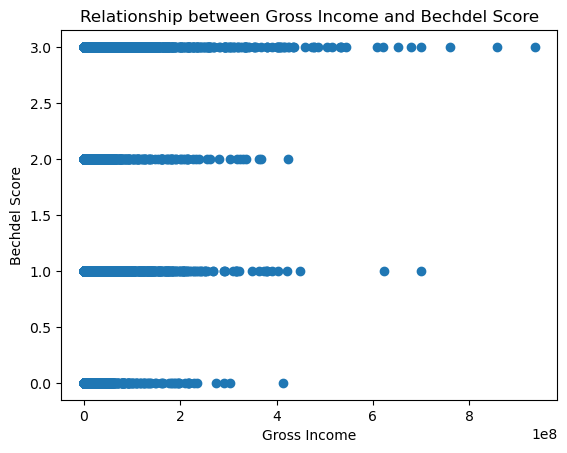

In [167]:
import matplotlib.pyplot as plt

# Plot scatter plot of gross income vs bechdel score
plt.scatter(df['gross_income'], df['bechdel_score'])

# Add labels and title
plt.xlabel('Gross Income')
plt.ylabel('Bechdel Score')
plt.title('Relationship between Gross Income and Bechdel Score')

# Show the plot
plt.show()


In [171]:
df_matches_dropped

,title,imdbid,bechdel_id,bechdel_score,year,imdb_rating,certificate,duration,genre,votes,gross_income,directors_name,stars_name,genre_1,genre_2,genre_3
0,Passage de Venus,3155794.0,9602,0,1874,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
1,La Rosace Magique,14495706.0,9804,0,1877,5.9,Not Certified,1,"Short, Animation",117,0.0,Émile Reynaud,nm0000000,Short,Animation,None
2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
3,Le singe musicien,12592084.0,9806,0,1878,6.2,Not Certified,1,"Animation, Short",220,0.0,Émile Reynaud,nm0000000,Animation,Short,None
4,Athlete Swinging a Pick,7816420.0,9816,0,1881,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9344,Encanto,2953050.0,10151,3,2021,7.2,PG,102,"Animation, Comedy, Family",203532,96093622.0,"Jared Bush,Byron Howard,Charise Castro Smith","Stephanie Beatriz,María Cecilia Botero,John Leguizamo,Mauro Castillo",Animation,Comedy,Family
9345,Love Hard,10752004.0,10152,2,2021,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
9346,West Side Story,3581652.0,10157,3,2021,7.2,PG-13,156,"Crime, Drama, Musical","74,390",1872994.0,Steven Spielberg,"Ansel Elgort,Rachel Zegler,Ariana DeBose,David Alvarez",Crime,Drama,Musical
9347,Every Time a Bell Rings,15943414.0,10158,3,2021,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None


In [185]:
df_matches_dropped[df_matches_dropped['year'] >= 1874].head(500)


,title,imdbid,bechdel_id,bechdel_score,year,imdb_rating,certificate,duration,genre,votes,gross_income,directors_name,stars_name,genre_1,genre_2,genre_3
0,Passage de Venus,3155794.0,9602,0,1874,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
1,La Rosace Magique,14495706.0,9804,0,1877,5.9,Not Certified,1,"Short, Animation",117,0.0,Émile Reynaud,nm0000000,Short,Animation,None
2,Sallie Gardner at a Gallop,2221420.0,9603,0,1878,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
3,Le singe musicien,12592084.0,9806,0,1878,6.2,Not Certified,1,"Animation, Short",220,0.0,Émile Reynaud,nm0000000,Animation,Short,None
4,Athlete Swinging a Pick,7816420.0,9816,0,1881,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
5,Buffalo Running,5459794.0,9831,0,1883,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
6,L&#39;homme machine,8588366.0,9832,0,1885,5.3,Not Certified,1,"Animation, Short",347,0.0,Étienne-Jules Marey,nm0000000,Animation,Short,None
7,Man Walking Around the Corner,2075247.0,9614,0,1887,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
8,Cockatoo Flying,8133192.0,9836,0,1887,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None
9,Child Carrying Flowers to Woman,7411790.0,9837,0,1887,6.6,Not Rated,90,None,0,7000000.0,missing,missing,None,None,None


In [186]:
df_matches_dropped[df_matches_dropped['directors_name'] == 'Ida Lupino'].head(10)


,title,imdbid,bechdel_id,bechdel_score,year,imdb_rating,certificate,duration,genre,votes,gross_income,directors_name,stars_name,genre_1,genre_2,genre_3
742,"Hitch-Hiker, The",45877.0,4301,0,1953,6.9,Approved,71,"Crime, Drama, Film-Noir","8,889",6849998.0,Ida Lupino,"Edmond O'Brien,Frank Lovejoy,William Talman,José Torvay",Crime,Drama,Film-Noir
